In [4]:
import imutils
import cv2
from matplotlib import pyplot as plt




In [5]:
#https://www.pyimagesearch.com/2016/02/08/opencv-shape-detection/
# import the necessary packages
#shapedetector.py

class ShapeDetector:
    def __init__(self):
        pass
    def detect(self, c):
        # initialize the shape name and approximate the contour
        shape = "unidentified"
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.04 * peri, True)
    
        # if the shape is a triangle, it will have 3 vertices
        if len(approx) == 3:
            shape = "triangle"
        # if the shape has 4 vertices, it is either a square or
        # a rectangle
        elif len(approx) == 4:
            # compute the bounding box of the contour and use the
            # bounding box to compute the aspect ratio
            (x, y, w, h) = cv2.boundingRect(approx)
            ar = w / float(h)
            # a square will have an aspect ratio that is approximately
            # equal to one, otherwise, the shape is a rectangle
            shape = "square" if ar >= 0.95 and ar <= 1.05 else "rectangle"
        # if the shape is a pentagon, it will have 5 vertices
        elif len(approx) == 5:
            shape = "pentagon"
        # otherwise, we assume the shape is a circle
        else:
            shape = "circle"
        # return the name of the shape
        return shape

circle 517 728
triangle 703 651
rectangle 238 616
triangle 346 535
circle 640 538
rectangle 466 509
rectangle 799 425
circle 548 393
rectangle 664 371
circle 220 368
rectangle 543 291
square 313 271
pentagon 424 277
square 377 150
square 201 172
pentagon 589 157


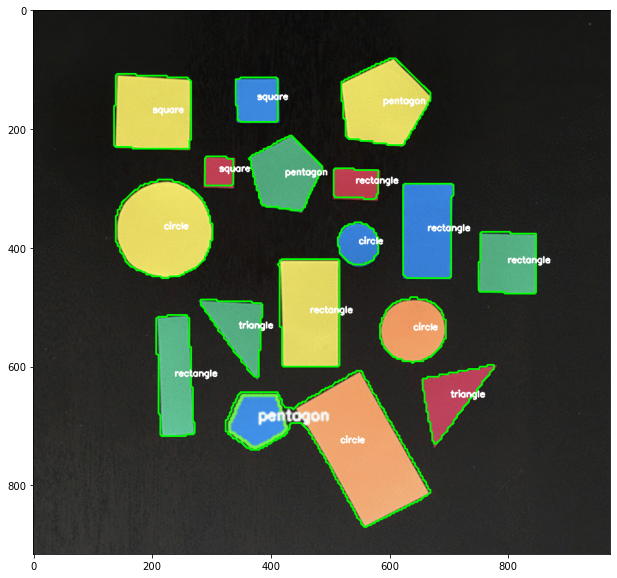

In [9]:
# import the necessary packages
#OpenCV shape detection

import argparse
import imutils
import cv2

# construct the argument parse and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-i", "--image", required=True, help="path to the input image")
#args = vars(ap.parse_args())

path = 'test_img.png'

# load the image and resize it to a smaller factor so that
# the shapes can be approximated better
image = cv2.imread(path)
resized = imutils.resize(image, width=300)
ratio = image.shape[0] / float(resized.shape[0])
# convert the resized image to grayscale, blur it slightly,
# and threshold it
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]
# find contours in the thresholded image and initialize the
# shape detector
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
sd = ShapeDetector()

# loop over the contours
for c in cnts:
    # compute the center of the contour, then detect the name of the
    # shape using only the contour
    M = cv2.moments(c)
    cX = int((M["m10"] / M["m00"]) * ratio)
    cY = int((M["m01"] / M["m00"]) * ratio)
    shape = sd.detect(c)
    # multiply the contour (x, y)-coordinates by the resize ratio,
    # then draw the contours and the name of the shape on the image
    c = c.astype("float")
    c *= ratio
    c = c.astype("int")
    print(shape,cX,cY)
    cv2.drawContours(image, [c], -1, (0, 255, 0), 2)
    cv2.putText(image, shape, (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
    # show the output image
    #cv2.imshow("Image", image)
    #cv2.waitKey(0)
    
plt.figure(figsize=(20,10))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

In [ ]:
cv2.imshow("Image", image)
cv2.waitKey(1)

In [4]:
#https://www.pyimagesearch.com/2016/02/15/determining-object-color-with-opencv/

In [26]:
# import the necessary packages
from scipy.spatial import distance as dist
from collections import OrderedDict
import numpy as np
import cv2
class ColorLabeler:
    def __init__(self):
        # initialize the colors dictionary, containing the color
        # name as the key and the RGB tuple as the value
        colors = OrderedDict({
            "red": (255, 0, 0),
            "green": (0, 255, 0),
            "blue": (0, 0, 255)})
        # allocate memory for the L*a*b* image, then initialize
        # the color names list
        self.lab = np.zeros((len(colors), 1, 3), dtype="uint8")
        self.colorNames = []
        # loop over the colors dictionary
        for (i, (name, rgb)) in enumerate(colors.items()):
            # update the L*a*b* array and the color names list
            self.lab[i] = rgb
            self.colorNames.append(name)
        # convert the L*a*b* array from the RGB color space
        # to L*a*b*
        self.lab = cv2.cvtColor(self.lab, cv2.COLOR_RGB2LAB)
        
    def label(self, image, c):
        # construct a mask for the contour, then compute the
        # average L*a*b* value for the masked region
        mask = np.zeros(image.shape[:2], dtype="uint8")
        cv2.drawContours(mask, [c], -1, 255, -1)
        mask = cv2.erode(mask, None, iterations=2)
        mean = cv2.mean(image, mask=mask)[:3]
        # initialize the minimum distance found thus far
        minDist = (np.inf, None)
        # loop over the known L*a*b* color values
        for (i, row) in enumerate(self.lab):
            # compute the distance between the current L*a*b*
            # color value and the mean of the image
            d = dist.euclidean(row[0], mean)
            # if the distance is smaller than the current distance,
            # then update the bookkeeping variable
            if d < minDist[0]:
                minDist = (d, i)
        # return the name of the color with the smallest distance
        return self.colorNames[minDist[1]]

red circle 517 728
table coodinates:  [[0.1390965  0.44290912]]
red triangle 703 651
table coodinates:  [[1.1773543 0.9548285]]
green rectangle 238 616
table coodinates:  [[-1.5031308  1.2730749]]
green triangle 346 535
table coodinates:  [[-1.2058735  2.4560654]]
red circle 640 538
table coodinates:  [[1.288953  2.4121268]]
green rectangle 466 509
table coodinates:  [[-0.21632877  3.0785165 ]]
green rectangle 799 425
table coodinates:  [[6.027313  7.6651063]]
blue circle 548 393
table coodinates:  [[ 1.741829 12.691675]]
blue rectangle 664 371
table coodinates:  [[ 8.614095 22.0894  ]]
green circle 220 368
table coodinates:  [[-13.502623  22.50679 ]]
red rectangle 543 291
table coodinates:  [[ -1.977123 -19.930904]]
red square 313 271
table coodinates:  [[  4.792329 -14.607303]]
green pentagon 424 277
table coodinates:  [[  1.9729542 -15.774304 ]]
blue square 377 150
table coodinates:  [[ 1.0701525 -6.0917664]]
green square 201 172
table coodinates:  [[ 3.0745564 -6.7386537]]
green pe

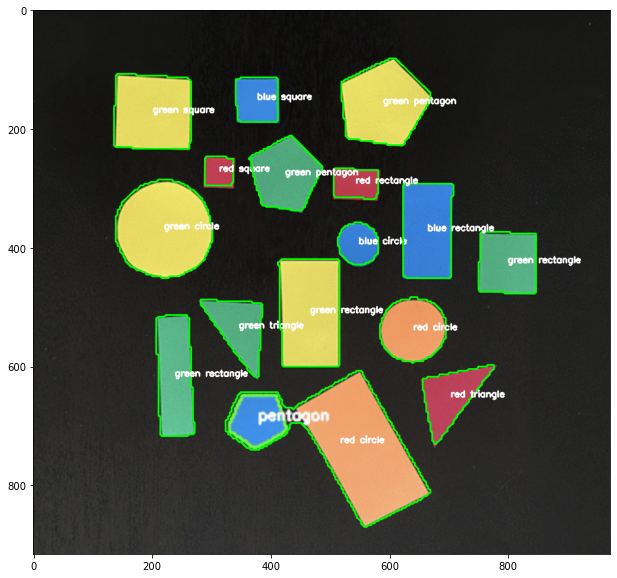

In [55]:
# import the necessary packages
import argparse
import imutils
import cv2
# construct the argument parse and parse the arguments

path = 'test_img.png'

# load the image and resize it to a smaller factor so that
# the shapes can be approximated better
image = cv2.imread(path)

resized = imutils.resize(image, width=300)
ratio = image.shape[0] / float(resized.shape[0])
# blur the resized image slightly, then convert it to both
# grayscale and the L*a*b* color spaces
blurred = cv2.GaussianBlur(resized, (5, 5), 0)
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
lab = cv2.cvtColor(blurred, cv2.COLOR_BGR2LAB)
thresh = cv2.threshold(gray, 60, 255, cv2.THRESH_BINARY)[1]
# find contours in the thresholded image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
# initialize the shape detector and color labeler
sd = ShapeDetector()
cl = ColorLabeler()


# loop over the contours
for c in cnts:
    # compute the center of the contour
    M = cv2.moments(c)
    cX = int((M["m10"] / M["m00"]) * ratio)
    cY = int((M["m01"] / M["m00"]) * ratio)
    # detect the shape of the contour and label the color
    shape = sd.detect(c)
    color = cl.label(lab, c)
    # multiply the contour (x, y)-coordinates by the resize ratio,
    # then draw the contours and the name of the shape and labeled
    # color on the image
    c = c.astype("float")
    c *= ratio
    c = c.astype("int")
    text = "{} {}".format(color, shape)
    print(color, shape,cX,cY)
    print('table coodinates: ', np.squeeze(cv2.perspectiveTransform(np.float32([cX,cY]).reshape(-1,1,2).astype(np.float32), H), axis=1))
    cv2.drawContours(image, [c], -1, (0, 255, 0), 2)
    cv2.putText(image, text, (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
    # show the output image
#   cv2.imshow("Image", image)
#   cv2.waitKey(0)

plt.figure(figsize=(20,10))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

In [37]:
# to calculate the transformation matrix
input_pts = np.float32([[176,511],[797,513],[391,391],[588,392]])
output_pts = np.float32([[-3,3],[3,3],[-3,13],[3,13]])
#output_pts = np.float32([[176,511],[797,513],[176,0],[797,0]])


# Compute the perspective transform M
H = np.float32(cv2.getPerspectiveTransform(input_pts,output_pts))
print('Homography Matrix: \n', H)

Homography Matrix: 
 [[-5.1275012e-03 -7.0846283e-05  2.5384142e+00]
 [ 8.5683478e-06  4.9511008e-03 -4.1312923e+00]
 [ 1.7854569e-05 -3.0066529e-03  1.0000000e+00]]


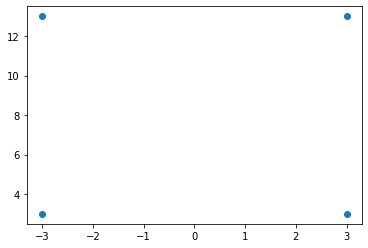

In [38]:
transform_points = input_pts.reshape(-1,1,2).astype(np.float32)

#apply homography transfrom
cartesian_points = cv2.perspectiveTransform(transform_points, H)
reduced_cartesian_points = np.squeeze(cartesian_points, axis=1)

#plot 2d cartesian points (birds eye view)
plt.scatter(reduced_cartesian_points[:,0], reduced_cartesian_points[:,1])

In [49]:
cv2.perspectiveTransform(np.float32([176,511]).reshape(-1,1,2).astype(np.float32), H)



array([[[-2.9999998,  3.0000002]]], dtype=float32)